# Demonstration notebook for processing new climate indices 

* This example shows creation of the Circumglobal Teleconnection, defined in [Beverley, J.D., Woolnough, S.J., Baker, L.H. et al](https://link.springer.com/article/10.1007/s00382-018-4371-4#Sec1 )
* We used the area 35–40N, 60–70E, using 200 hPa geopotental height to define the index 

In [1]:
import iris 
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import iris.pandas
import pandas as pd

* Load in the required data, in this case monthly globally gridded ERA5 reanalysis from 1979 - 2019

In [38]:
indir = '/example/directory/to/load/data/from/'
cube = iris.load_cube(f'{indir}ERA5_200hPa_geopot_monthly_1979_2019.nc')

In [39]:
cube

Geopotential (m**2 s**-2),time,latitude,longitude
Shape,492,721,1440
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Attributes,,,Conventions 'CF-1.7'


* We need to add month and year coordinates to use later when creating a pandas data frame
* Since we are using monthly data we don't need to perform any aggregation
    * If we had hourly data, we could use these coordinates to calculate the monthly average 


In [40]:
iris.coord_categorisation.add_month(cube, 'time', name='month')
iris.coord_categorisation.add_year(cube, 'time', name='year')

* Create constraints on Latitude and Longitude to cut out our defined box 

In [41]:
lat_constraint = iris.Constraint(latitude=lambda cell: 35 < cell < 40)
lon_constraint = iris.Constraint(longitude=lambda cell: 60 < cell < 70)

* Cut out the box using extract

In [42]:
cut_cube = cube.extract(lat_constraint & lon_constraint)

* Collapasing the cube on latitude and longitude, taking the mean of all the points will give us a monthly index 

In [ ]:
collapsed_cube = cut_cube.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)

* Now we need to extract the data from the cube to put into a pandas data frame 
* Extracting points like this ensures we keep all the data in it's correct point 
* for the time coordinates, we can access them via coord and extract the data with points 
* for the data itself, we use .data.data ( as we have a masked array we need the second .data) 
* if you're unsure about these coordinates, print them and explore

In [44]:
months = collapsed_cube.coord('month').points
years = collapsed_cube.coord('year').points
points = collapsed_cube.data.data


* Create a data frame with the data 

In [45]:
df = pd.DataFrame(data = {'Year':years, 'Month':months,'Points':points})

In [46]:
df.head()

,Year,Month,Points
0,1979,Jan,114997.270940
1,1979,Feb,114661.797759
2,1979,Mar,115054.453251
3,1979,Apr,117742.850647
4,1979,May,117701.770035


* Use pandas pivot function to create the correct format for our CSV, with the months in the column 

In [47]:
df = df.pivot(index = 'Year',
                columns = 'Month',
               values = 'Points')

In [48]:
df.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1979,117742.850647,121681.137695,115301.421651,114661.797759,114997.270940,122762.550952,120696.675611,115054.453251,117701.770035,117278.408722,118655.836595,120231.592054
1980,117746.465225,121910.398931,115923.673333,114469.594254,114163.905184,122647.030719,121052.831603,115462.655867,118880.563282,117131.865154,117751.145726,120488.414539
1981,117575.032005,122033.976286,115345.139624,114771.442075,114852.133627,122218.095520,119970.663123,115796.117855,119085.582425,116725.613844,117641.392241,120350.223853
1982,117843.659482,122092.514551,115269.425163,113862.607426,114414.226326,121671.408199,120612.494470,115326.681755,118934.333514,116018.311873,117843.572742,119543.336719
1983,116767.578026,122868.742485,115220.480798,114613.495891,114928.142344,122209.777490,120453.353880,114857.950640,118958.452477,116965.540602,118625.079009,120850.555444


* It looks awkward that April is the first in the dataframe so lets reorder  

In [49]:
df = df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [50]:
df.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1979,114997.270940,114661.797759,115054.453251,117742.850647,117701.770035,120696.675611,122762.550952,121681.137695,120231.592054,118655.836595,117278.408722,115301.421651
1980,114163.905184,114469.594254,115462.655867,117746.465225,118880.563282,121052.831603,122647.030719,121910.398931,120488.414539,117751.145726,117131.865154,115923.673333
1981,114852.133627,114771.442075,115796.117855,117575.032005,119085.582425,119970.663123,122218.095520,122033.976286,120350.223853,117641.392241,116725.613844,115345.139624
1982,114414.226326,113862.607426,115326.681755,117843.659482,118934.333514,120612.494470,121671.408199,122092.514551,119543.336719,117843.572742,116018.311873,115269.425163
1983,114928.142344,114613.495891,114857.950640,116767.578026,118958.452477,120453.353880,122209.777490,122868.742485,120850.555444,118625.079009,116965.540602,115220.480798


* before we save, it's always useful to visualise the cutout region 
* we can visualise the coastlines and our cut out region to compare with the paper to check we have the correct place!

/home/h06/ncreaser/.conda/envs/tigra_v5_pt2/lib/python3.10/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h06/ncreaser/.conda/envs/tigra_v5_pt2/lib/python3.10/site-packages/iris/coords.py:2045: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


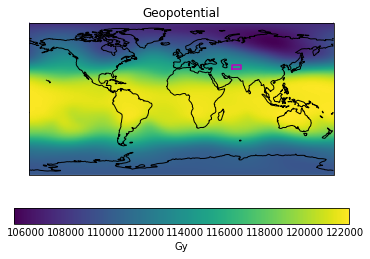

In [54]:
qplt.pcolormesh(cube[0])
plt.gca().coastlines()
plt.gca().plot([60,60,70,70,60],[35,40,40,35,35],'m')

* Looks like we match the paper, let's save our index  
* Commented out as they shouldn't be run on this binder instance !

In [ ]:
#save_dir '/directory/to/save/your/data/

In [ ]:
#df.to_csv(f'{save_dir}cgt_monthly_1979_2019.csv')